# Red Wine Machine Learning Model

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [2]:
path = 'Resources/RedWine_dataset.csv'
red_wine_df1 = pd.read_csv(path)
red_wine_df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine_df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
#red_wine_df1['quality'] = red_wine_df1.quality.apply(lambda q: '1' if q <= 5 else '2' if q < 7 else '3')
#red_wine_df1.head()

In [5]:
red_wine_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [6]:
# Check for null values
red_wine_df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Sort quality values
red_wine_df1['quality'].value_counts().sort_values() 

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

In [8]:
# Check value counts
for col in red_wine_df1:
    print(red_wine_df1[col].value_counts(ascending=False), '\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64 

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64 

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64 

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64 

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64 

6     139
5     104
10     79
15     78
12     75
7      71
9      62
16     61
17     60
11     59


In [9]:
# Show rows and columns of original dataset
red_wine_df1.shape

(1599, 12)

In [10]:
# Drop Duplicates
# Show rows and columns of updated dataset
red_wine=red_wine_df1.copy()
red_wine.drop_duplicates(subset=None,inplace=True)
red_wine.shape

(1359, 12)

In [11]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   int64  
 6   total sulfur dioxide  1359 non-null   int64  
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 138.0 KB


###### No categorical variables found in dataset // All variables are qualitative

### Correlation Heatmap

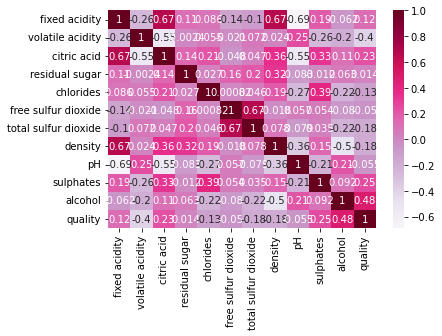

In [12]:
sns.heatmap(red_wine.corr(), annot=True,cmap='PuRd')
plt.show()

## Split the Data into Training and Testing

In [13]:
# Dividing the dataset in training and testing set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

np.random.seed(0)
df_train,df_test=train_test_split(red_wine,train_size=0.7,test_size=0.3,random_state=100)

In [14]:
# Create our features
X = red_wine[list(red_wine.columns)[:-1]]

# Create our target
y = red_wine['quality']

In [15]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.894040,46.826343,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447595,33.409287,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [16]:
y.describe()

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [17]:
y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [19]:
# Training model info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 31 to 926
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         951 non-null    float64
 1   volatile acidity      951 non-null    float64
 2   citric acid           951 non-null    float64
 3   residual sugar        951 non-null    float64
 4   chlorides             951 non-null    float64
 5   free sulfur dioxide   951 non-null    int64  
 6   total sulfur dioxide  951 non-null    int64  
 7   density               951 non-null    float64
 8   pH                    951 non-null    float64
 9   sulphates             951 non-null    float64
 10  alcohol               951 non-null    float64
 11  quality               951 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 96.6 KB


In [20]:
# Testing model info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 1573 to 677
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         408 non-null    float64
 1   volatile acidity      408 non-null    float64
 2   citric acid           408 non-null    float64
 3   residual sugar        408 non-null    float64
 4   chlorides             408 non-null    float64
 5   free sulfur dioxide   408 non-null    int64  
 6   total sulfur dioxide  408 non-null    int64  
 7   density               408 non-null    float64
 8   pH                    408 non-null    float64
 9   sulphates             408 non-null    float64
 10  alcohol               408 non-null    float64
 11  quality               408 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 41.4 KB


In [21]:
df_train.shape

(951, 12)

In [22]:
df_test.shape

(408, 12)

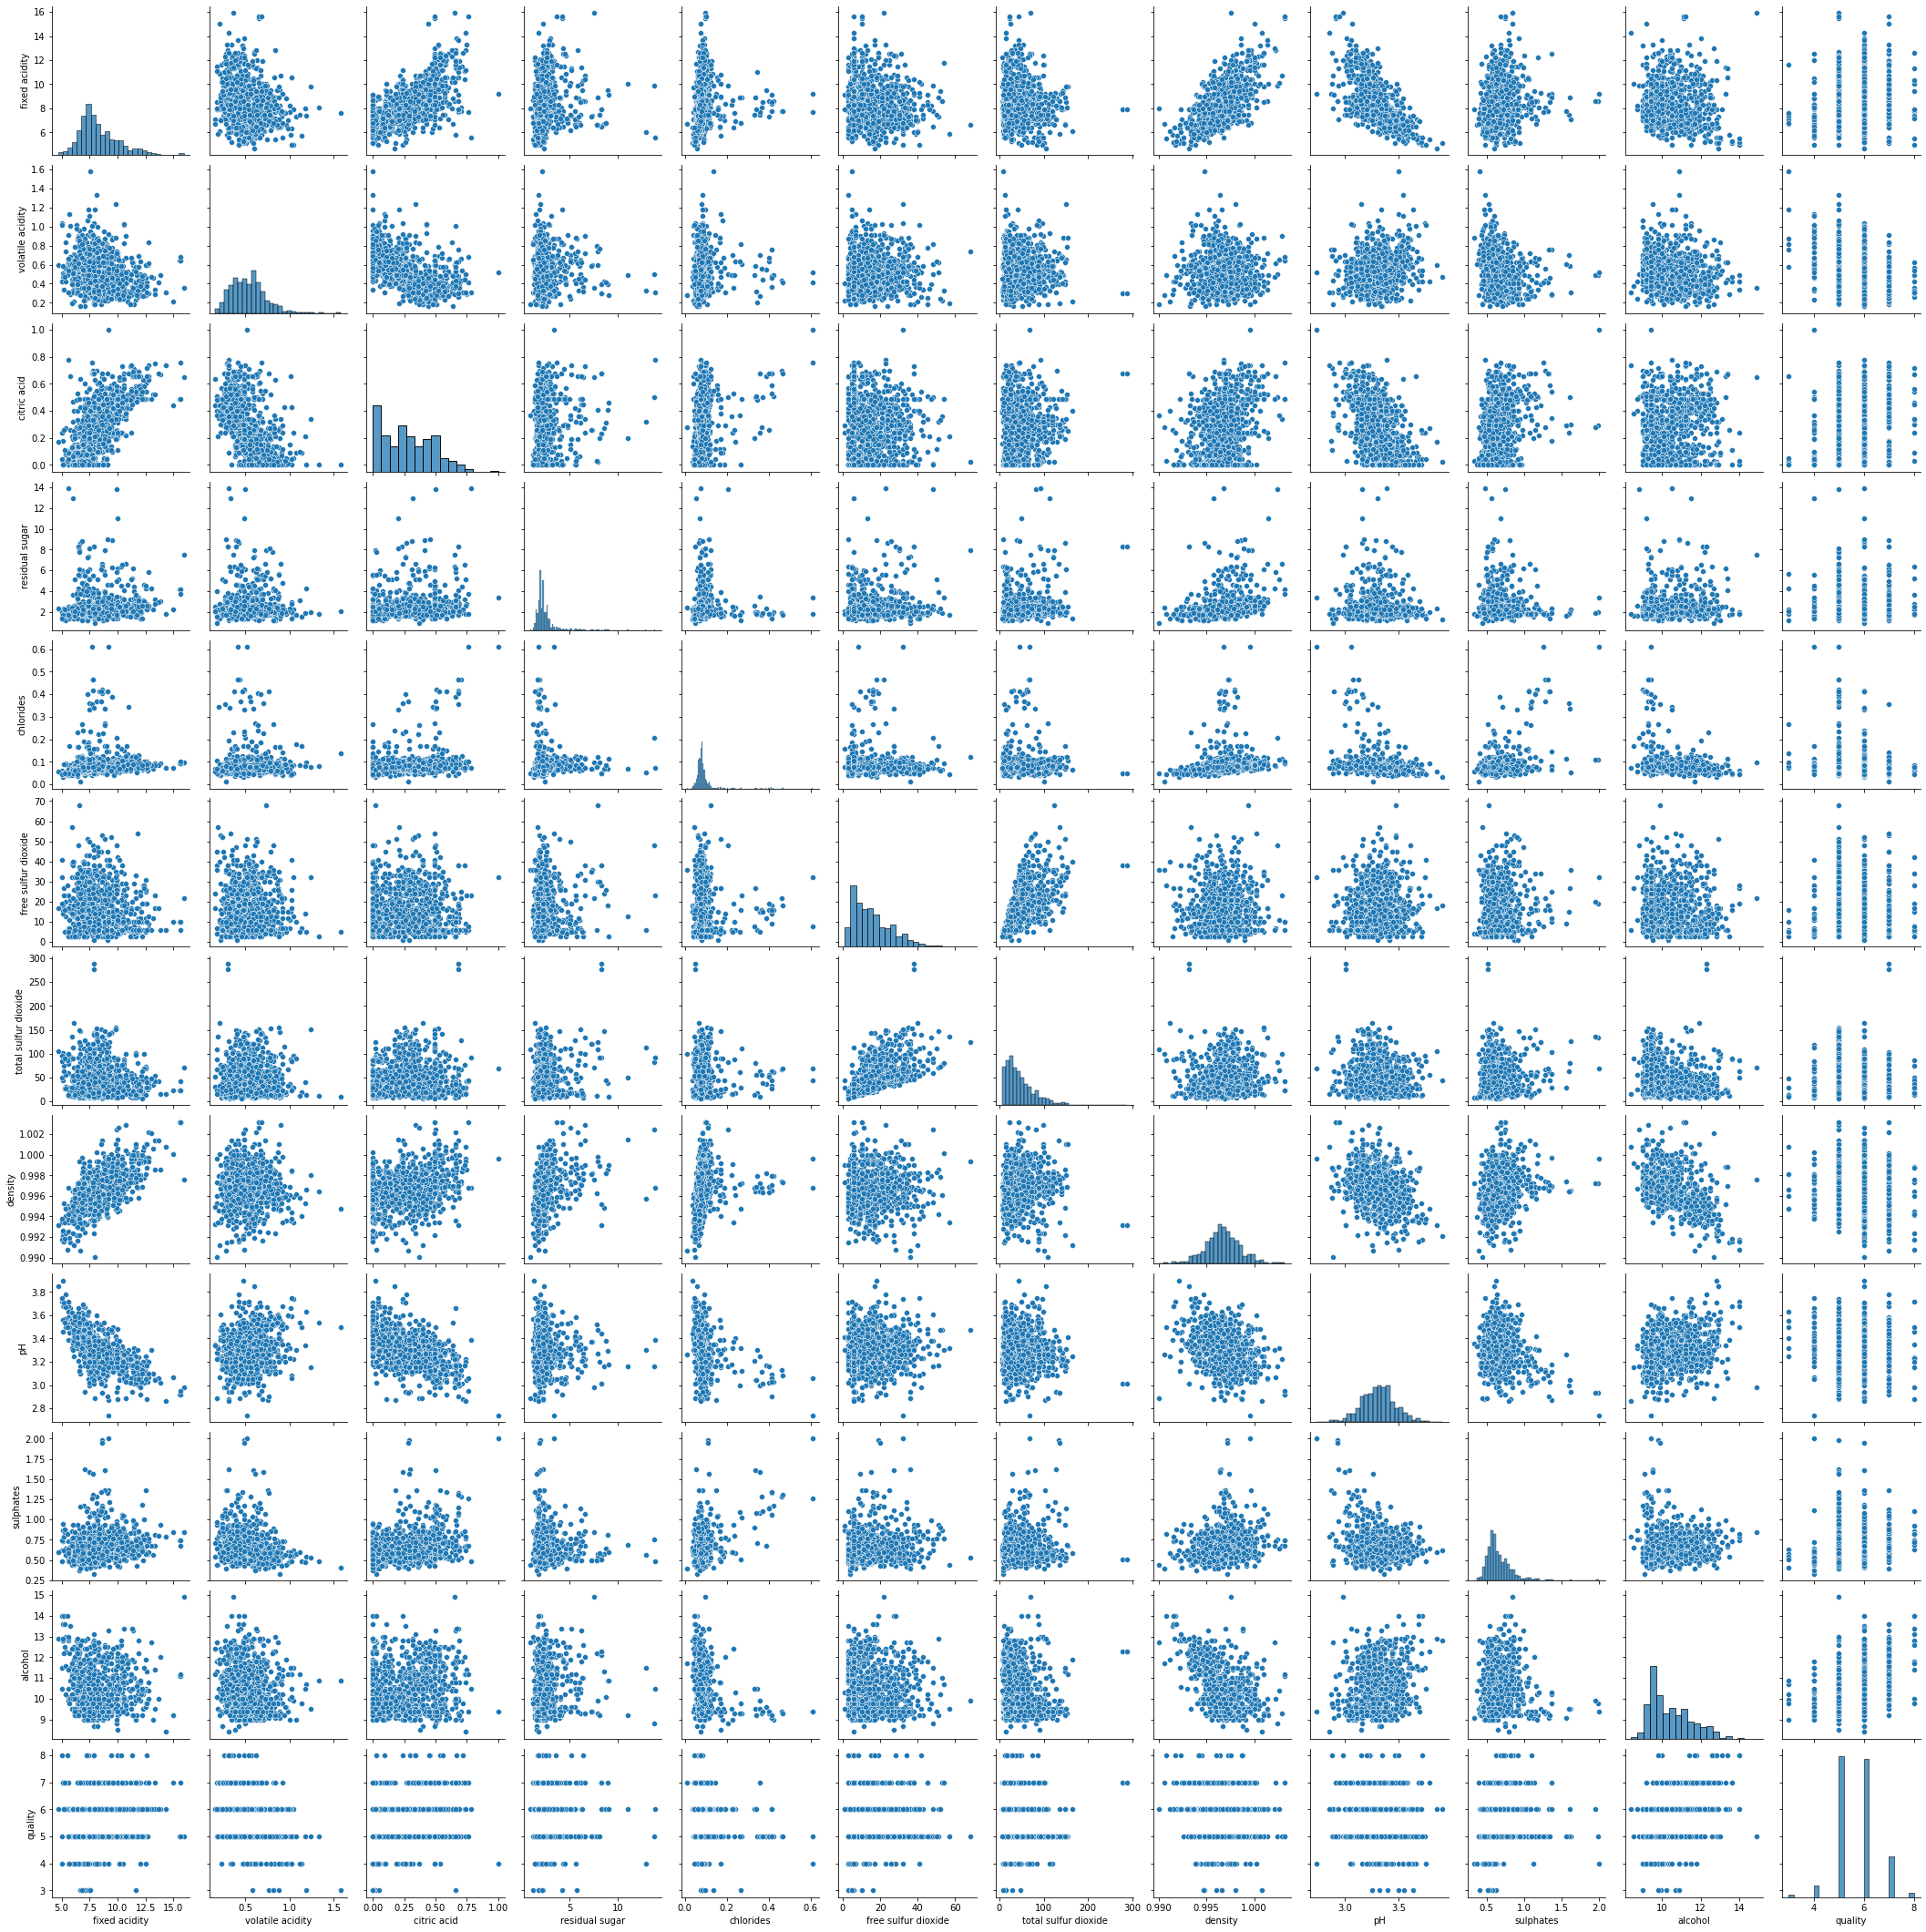

In [23]:
# Pairplot: see both distribution of single variables and relationships between two variables
sns.pairplot(df_train) 
plt.show()

## Rescaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22,37,0.99660,3.46,0.57,10.6,6
371,7.9,0.240,0.40,1.6,0.056,11,25,0.99670,3.32,0.87,8.7,6
952,8.2,0.310,0.40,2.2,0.058,6,10,0.99536,3.31,0.68,11.2,7
1037,7.3,0.910,0.10,1.8,0.074,20,56,0.99672,3.35,0.56,9.2,5
1398,7.0,0.600,0.12,2.2,0.083,13,28,0.99660,3.52,0.62,10.2,7


In [25]:
scaler.fit_transform(df_train[:])

array([[0.19642857, 0.36971831, 0.        , ..., 0.14371257, 0.33846154,
        0.6       ],
       [0.28571429, 0.05633803, 0.4       , ..., 0.32335329, 0.04615385,
        0.6       ],
       [0.3125    , 0.1056338 , 0.4       , ..., 0.20958084, 0.43076923,
        0.8       ],
       ...,
       [0.66964286, 0.22535211, 0.54      , ..., 0.16766467, 0.32307692,
        0.6       ],
       [0.19642857, 0.27464789, 0.15      , ..., 0.15568862, 0.26153846,
        0.4       ],
       [0.41964286, 0.05633803, 0.33      , ..., 0.34131737, 0.27692308,
        0.6       ]])

In [26]:
scaler_filename = "scaler.save"

import joblib
joblib.dump(scaler, scaler_filename)

['scaler.save']

In [27]:
df_train[:]=scaler.fit_transform(df_train[:])
df_train.head()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,0.196429,0.369718,0.00,0.123077,0.155259,0.313433,0.109541,0.497334,0.620690,0.143713,0.338462,0.6
371,0.285714,0.056338,0.40,0.053846,0.073456,0.149254,0.067138,0.504950,0.500000,0.323353,0.046154,0.6
952,0.312500,0.105634,0.40,0.100000,0.076795,0.074627,0.014134,0.402894,0.491379,0.209581,0.430769,0.8
1037,0.232143,0.528169,0.10,0.069231,0.103506,0.283582,0.176678,0.506474,0.525862,0.137725,0.123077,0.4
1398,0.205357,0.309859,0.12,0.100000,0.118531,0.179104,0.077739,0.497334,0.672414,0.173653,0.276923,0.8


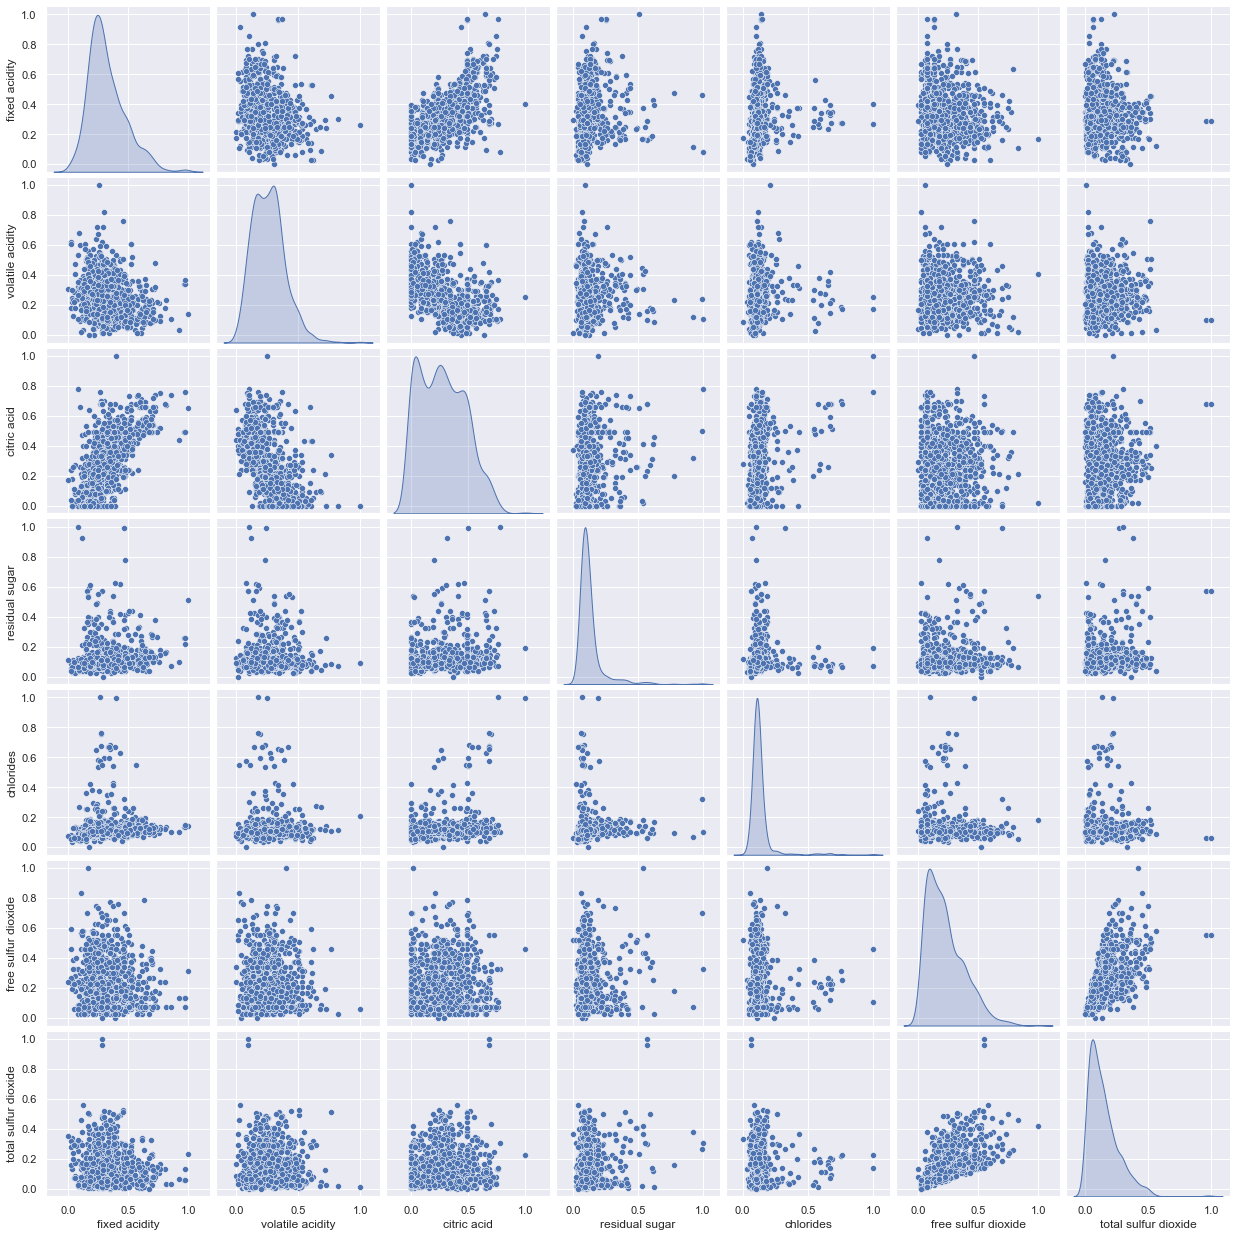

In [28]:
# Multi-Variate Analysis
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

## Linear Regression

In [29]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

[5.34996239 5.75424676 4.79038861 ... 5.52871272 5.14550538 6.15197582]
[5.51080157 4.8642171  4.67210314 6.20391924 5.3411191  6.13762078
 5.4349906  5.88211221 5.83796052 6.27738762 5.73759077 6.32822539
 5.28003276 6.02434508 5.82612473 6.51939581 6.05683362 5.56722712
 5.04367684 6.35462887 5.71912241 4.99951989 6.36356165 6.14603335
 5.30096545 5.02860182 5.52300929 6.30135992 5.5731288  5.59077012
 5.98050173 6.82356206 4.9510728  6.37181114 4.77104741 5.31025336
 5.71422332 5.50257611 5.99780767 6.45912661 6.50923014 5.26274681
 5.45037091 5.04558797 5.32218165 5.48888865 5.1189847  6.68867851
 5.13554485 6.2027222  6.19579556 5.0601486  5.18339715 6.43610913
 5.86801846 5.17940841 5.92421645 5.95149873 6.45623605 4.96179617
 5.25478745 6.07229853 5.68384848 5.16850612 6.33802783 5.12408307
 5.65996418 5.55962926 6.35107175 5.36275428 6.16404269 5.55812908
 5.72064559 5.97181073 5.67814719 5.5719705  5.52482605 5.465778
 5.91008971 5.12495375 5.72074107 5.49141469 5.59250324 5.1

In [31]:
# calculating Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)

0.6605414010487236
0.6486901288049047


In [32]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)

[6. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 6. 6. 7. 6. 6. 5. 6. 6. 5. 6. 6.
 5. 5. 6. 6. 6. 6. 6. 7. 5. 6. 5. 5. 6. 6. 6. 6. 7. 5. 5. 5. 5. 5. 5. 7.
 5. 6. 6. 5. 5. 6. 6. 5. 6. 6. 6. 5. 5. 6. 6. 5. 6. 5. 6. 6. 6. 5. 6. 6.
 6. 6. 6. 6. 6. 5. 6. 5. 6. 5. 6. 5. 5. 5. 5. 6. 5. 5. 5. 6. 6. 5. 6. 6.
 6. 7. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 6. 5. 7. 6. 6. 6. 5. 5. 5. 5. 6.
 6. 5. 6. 5. 6. 5. 6. 6. 5. 5. 5. 6. 6. 6. 6. 5. 6. 6. 5. 6. 5. 5. 5. 6.
 5. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 5. 6. 6. 5. 5. 6. 5. 5. 5. 5. 5. 5. 5.
 6. 5. 5. 6. 5. 6. 6. 5. 5. 6. 5. 5. 5. 6. 6. 5. 6. 5. 7. 5. 6. 5. 5. 5.
 6. 4. 5. 6. 5. 6. 6. 6. 5. 7. 5. 5. 6. 6. 6. 6. 5. 5. 5. 6. 5. 6. 6. 5.
 5. 5. 6. 6. 7. 5. 6. 5. 6. 6. 6. 6. 6. 6. 6. 5. 5. 7. 5. 6. 5. 6. 5. 5.
 5. 5. 5. 5. 6. 5. 6. 5. 6. 6. 5. 5. 5. 6. 7. 6. 6. 6. 7. 5. 6. 5. 6. 5.
 5. 6. 6. 5. 6. 7. 5. 6. 5. 5. 7. 5. 6. 5. 5. 6. 5. 6. 6. 6. 5. 5. 5. 6.
 5. 5. 5. 5. 6. 6. 6. 5. 5. 6. 5. 5. 5. 6. 5. 6. 6. 6. 5. 6. 5. 6. 6. 7.
 6. 6. 5. 6. 6. 6. 6. 6. 5. 5. 7. 5. 6. 5. 5. 5. 5.

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.5084350444417205
Mean Squared Error: 0.42079888320892395
Root Mean Squared Error: 0.6486901288049047


### Balanced Random Forest Classifier

In [34]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [35]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [36]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.4162260659462152

In [37]:
# Display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[ 2  1  0  0  0  0]
 [ 3  6  1  3  0  0]
 [17 41 55 21  4  6]
 [ 8 12 32 27 26 29]
 [ 1  1  1  4 12 23]
 [ 0  0  0  0  2  2]]


In [38]:
# Print the imbalanced classification report

### Additional Visualizations

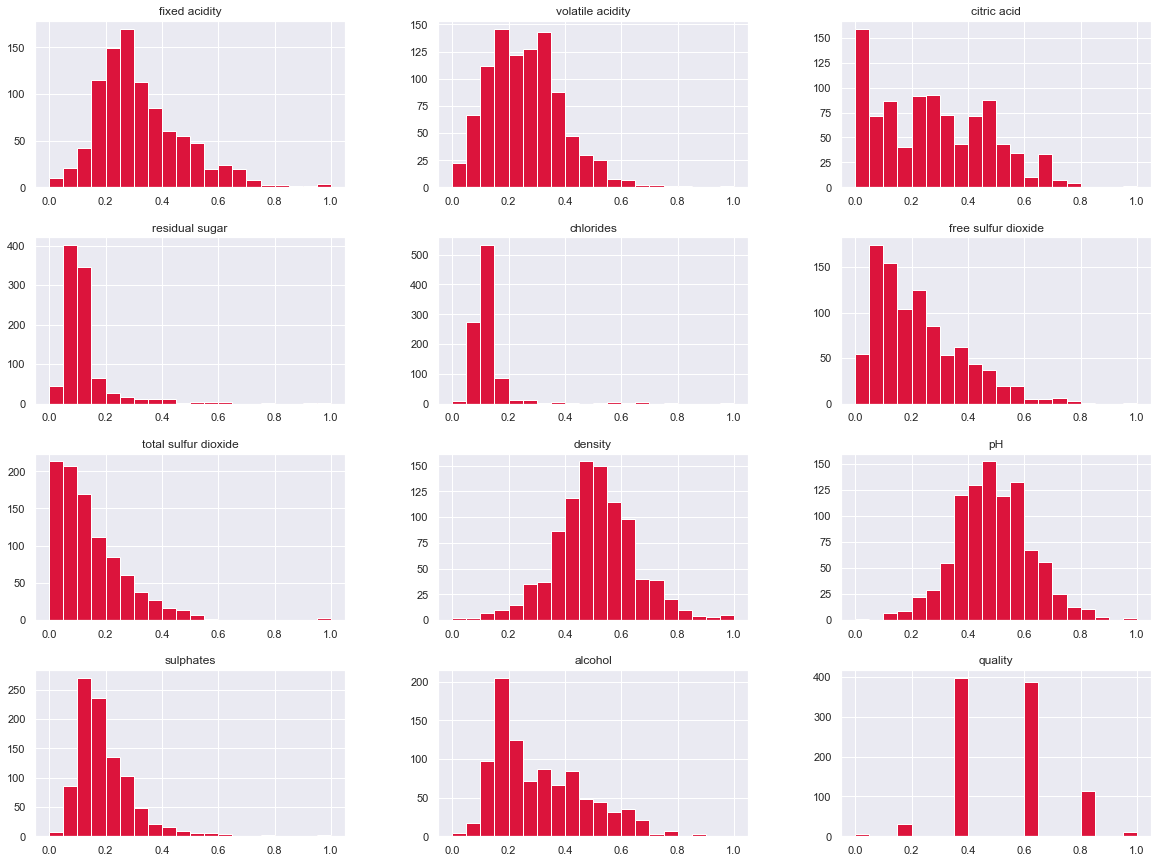

In [39]:
# Distributions of the variables / features
df_train.hist(figsize=(20,15),bins=20, color="crimson")
plt.show()

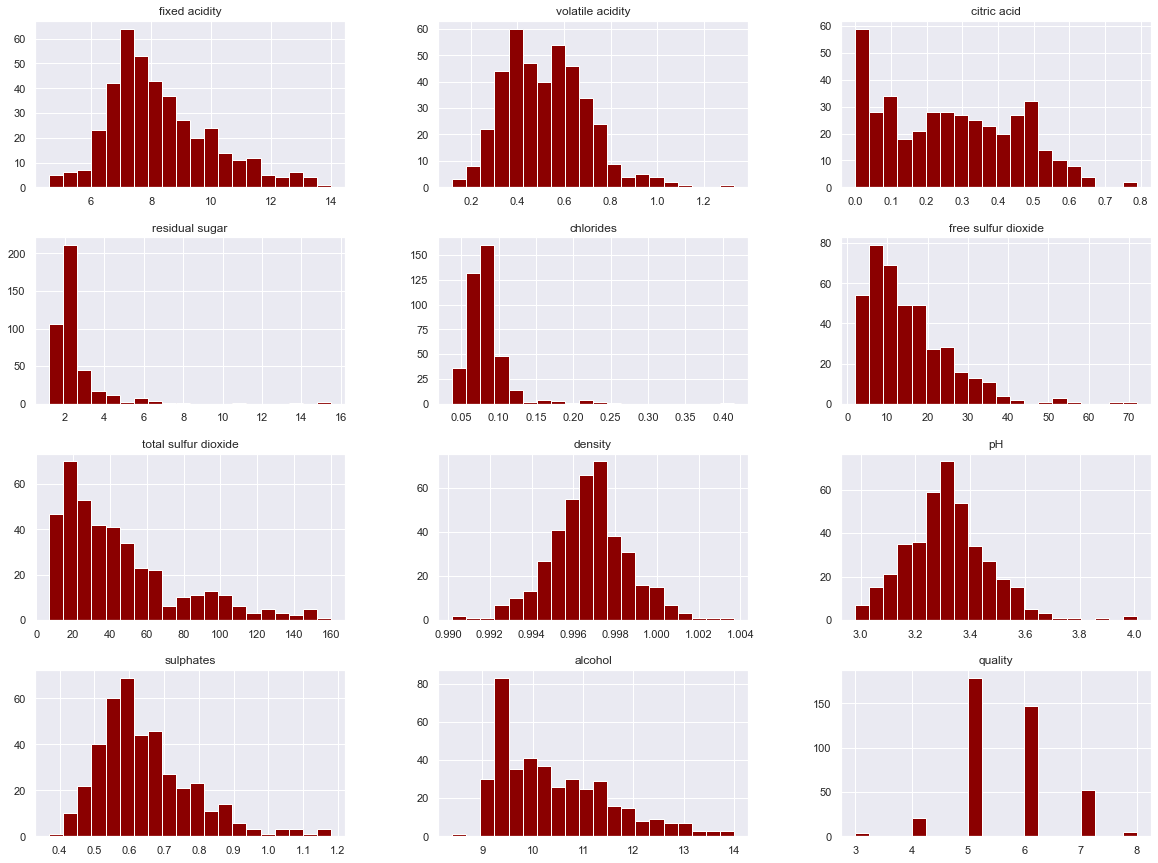

In [40]:
df_test.hist(figsize=(20,15),bins=20, color='darkred')
plt.show()

In [41]:
import pickle

# Save the model
filename = 'redwine_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))
 
# Load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.38346048873938055


In [42]:
# Save the model
#filename = 'redwine_model.sav'
#pickle.dump(regressor, open(filename, 'wb'))
 
# Load the model
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

0.38346048873938055
